In [0]:
# Import pacakges

import numpy as np

# ML packages
import tensorflow as tf

# Visualization packages
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

In [0]:
# Create the 2-D dataset of points within the range of 0 and 5
numSamples = 200
numDimensions = 2

maxXValue = 10
maxYValue = 7

trainDataPoints = np.array([np.random.randint(low=-maxXValue, high=maxXValue, size=(numSamples,)), np.random.randint(low=-maxYValue, high=maxYValue, size=(numSamples,))]).T
testDataPoints = np.array([np.random.randint(low=-maxXValue, high=maxXValue, size=(numSamples,)), np.random.randint(low=-maxYValue, high=maxYValue, size=(numSamples,))]).T

# Desired ellipse params
# (x - x0)^2/a^2 + (y - y0)^2/b^2 = r^2
center = (0, 0)
a = 1
b = 1
r = 5

trainLabels = ((np.square(trainDataPoints[:, 0] - center[0]) / np.square(a)) + (np.square(trainDataPoints[:, 1] - center[1]) / np.square(b)) > np.square(r))
testLabels = ((np.square(testDataPoints[:, 0] - center[0]) / np.square(a)) + (np.square(testDataPoints[:, 1] - center[1]) / np.square(b)) > np.square(r))

trainLabelsFloat = trainLabels.astype(float)
testLabelsFloat = trainLabels.astype(float)

outerPoints = trainDataPoints[trainLabels]

Text(0.5,1,'Train data')

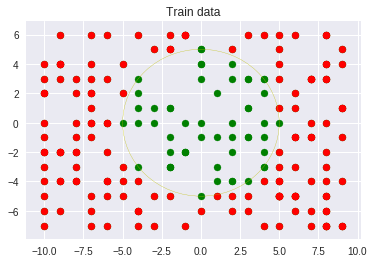

In [3]:
# Plot the dataset
fig, ax = plt.subplots()

ax.scatter(trainDataPoints[:, 0], trainDataPoints[:, 1], c='g')
ax.scatter(outerPoints[:, 0], outerPoints[:, 1], c='r')

ellipse = Ellipse(xy=center, width=(r * 2), height=(r * 2), angle=0.0, fill=False, color='y') # Draw the original ellipse

ax.add_patch(ellipse)
ax.set_title('Train data')

In [4]:
# Perform polynomial logistic regression
numIterations = 100
learningRate = 1e-1

# Clear previous graph
tf.reset_default_graph()

dataPointPlaceholder = tf.placeholder(tf.float32, shape=(None, numDimensions), name="dataPointPlaceholder")
labelPlaceholder = tf.placeholder(tf.float32, shape=(None,), name="labelPlaceholder")

# Create the model variables
def addMLPNode(dataInput, outDim):
	W = tf.Variable(tf.random_normal([int(dataInput.get_shape()[-1]), outDim]))
	b = tf.Variable(tf.zeros([outDim]))
	y = tf.matmul(dataInput, W) + b
	return y

# Create the model
hiddenDimension = 10
mlp = tf.nn.tanh(addMLPNode(dataPointPlaceholder, hiddenDimension))
mlp = tf.nn.sigmoid(addMLPNode(mlp, 1))
y = tf.reshape(mlp, [-1])
print (y.get_shape())

# Define the loss function
epsilon = 1e-8
with tf.name_scope('loss') as scope:
	loss = - (labelPlaceholder * tf.log(y + epsilon)) - ((1.0 - labelPlaceholder) * tf.log(1.0 - y + epsilon))
	loss = tf.reduce_mean(loss)
  
with tf.name_scope('accuracy'):
	correctPredictions = tf.equal(tf.round(y), tf.round(labelPlaceholder))
	accuracy = tf.reduce_mean(tf.cast(correctPredictions, tf.float32), name='accuracy')

with tf.name_scope('optimizer') as scope:
	optimizer = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(loss)

(?,)


In [5]:
# Train the model
print ("Training model")
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

with tf.Session(config=config) as sess:
  # Initializing the variables
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(numIterations):
    _, trainLoss, trainAccuracy = sess.run([optimizer, loss, accuracy], feed_dict={dataPointPlaceholder: trainDataPoints, labelPlaceholder: trainLabelsFloat})
    print ("Iteration: %d | Loss: %f | Accuracy: %f" % (i + 1, trainLoss, trainAccuracy))
  print ("Training finished!")

  # Generate predictions on the test set
  testSetPredictions, testLoss, testAccuracy = sess.run([y, loss, accuracy], feed_dict={dataPointPlaceholder: testDataPoints, labelPlaceholder: testLabelsFloat})

Training model
Iteration: 1 | Loss: 1.109483 | Accuracy: 0.490000
Iteration: 2 | Loss: 0.839939 | Accuracy: 0.585000
Iteration: 3 | Loss: 0.676720 | Accuracy: 0.575000
Iteration: 4 | Loss: 0.621943 | Accuracy: 0.555000
Iteration: 5 | Loss: 0.621712 | Accuracy: 0.545000
Iteration: 6 | Loss: 0.621129 | Accuracy: 0.700000
Iteration: 7 | Loss: 0.608047 | Accuracy: 0.720000
Iteration: 8 | Loss: 0.587673 | Accuracy: 0.740000
Iteration: 9 | Loss: 0.563950 | Accuracy: 0.745000
Iteration: 10 | Loss: 0.539700 | Accuracy: 0.750000
Iteration: 11 | Loss: 0.517021 | Accuracy: 0.770000
Iteration: 12 | Loss: 0.499052 | Accuracy: 0.775000
Iteration: 13 | Loss: 0.488670 | Accuracy: 0.775000
Iteration: 14 | Loss: 0.485291 | Accuracy: 0.785000
Iteration: 15 | Loss: 0.484595 | Accuracy: 0.775000
Iteration: 16 | Loss: 0.482886 | Accuracy: 0.780000
Iteration: 17 | Loss: 0.478850 | Accuracy: 0.785000
Iteration: 18 | Loss: 0.472694 | Accuracy: 0.780000
Iteration: 19 | Loss: 0.465297 | Accuracy: 0.785000
Iterat

In [6]:
print ("Test Loss: %f | Test Accuracy: %f" % (testLoss, testAccuracy))

testSetPredictions = np.squeeze(testSetPredictions)
threshold = 0.5
testSetPredictions = testSetPredictions > threshold

Test Loss: 1.182634 | Test Accuracy: 0.570000


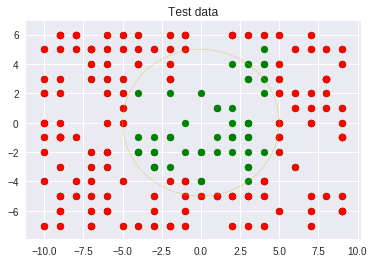

In [7]:
# Plot the predictions
fig2, ax2 = plt.subplots()
ax2.scatter(testDataPoints[:, 0], testDataPoints[:, 1], c='g')

outsidePointsTestSet = testDataPoints[testSetPredictions]
ax2.scatter(outsidePointsTestSet[:, 0], outsidePointsTestSet[:, 1], c='r')

ellipseTwo = Ellipse(xy=center, width=(r * 2), height=(r * 2), angle=0.0, fill=False, color='y') # Draw the original ellipse
ax2.add_patch(ellipseTwo)
ax2.set_title('Test data')

plt.show()